In [1]:
!pip install mrmr_selection

from pandas import read_excel
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import scipy
import statsmodels.formula.api as smf
import statsmodels.api as sm

from mrmr import mrmr_classif

import sklearn
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn import model_selection, preprocessing, feature_selection, ensemble, linear_model, metrics, decomposition
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, explained_variance_score, max_error
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, mean_absolute_percentage_error, d2_tweedie_score

In [2]:
df = pd.read_csv('/kaggle/input/secondary-school-result/Humanities.csv') 
df.drop('Group SSC', axis=1, inplace=True)
df.head()

,Gender,Father Highest Academic Qualification,Mother Highest Academic Qualification,Father Profession,Mother Profession,Father average monthly income,Mother average monthly income,How many siblings do you have,District Currently you are living,PEC Result Overall GPA,...,PEC Science,JSC Overall GPA,JSC Bangla,JSC English,JSC Mathematics,JSC BGS,JSC ICT,JSC Religion,JSC Science,Overall GPA SSC
0,0,3,3,2,2,100000,0,3,5,3.17,...,2.0,4.44,3.0,5.0,3.5,5.0,5.0,3.0,5.0,4.23
1,0,4,5,0,0,80000,70000,5,0,4.75,...,4.0,3.95,4.0,3.0,3.0,4.0,5.0,5.0,4.0,4.18
2,0,3,0,1,2,500000,0,3,1,3.16,...,3.5,4.00,5.0,4.0,3.5,3.5,5.0,4.0,3.5,3.58
3,1,4,0,0,2,15000,0,1,0,2.00,...,2.0,3.00,3.5,3.5,3.0,2.0,5.0,4.0,3.0,2.00
4,0,3,3,1,2,50000,0,3,5,4.83,...,5.0,4.50,4.0,5.0,3.0,5.0,5.0,5.0,5.0,5.00


In [3]:
pd.set_option('display.max_columns', 500)
df.head()

,Gender,Father Highest Academic Qualification,Mother Highest Academic Qualification,Father Profession,Mother Profession,Father average monthly income,Mother average monthly income,How many siblings do you have,District Currently you are living,PEC Result Overall GPA,PEC Bangla,PEC English,PEC Mathematics,PEC Religion,PEC BGS,PEC Science,JSC Overall GPA,JSC Bangla,JSC English,JSC Mathematics,JSC BGS,JSC ICT,JSC Religion,JSC Science,Overall GPA SSC
0,0,3,3,2,2,100000,0,3,5,3.17,3.5,3.5,4.0,4.0,2.0,2.0,4.44,3.0,5.0,3.5,5.0,5.0,3.0,5.0,4.23
1,0,4,5,0,0,80000,70000,5,0,4.75,5.0,4.0,3.5,5.0,5.0,4.0,3.95,4.0,3.0,3.0,4.0,5.0,5.0,4.0,4.18
2,0,3,0,1,2,500000,0,3,1,3.16,3.5,4.0,3.5,3.5,4.0,3.5,4.00,5.0,4.0,3.5,3.5,5.0,4.0,3.5,3.58
3,1,4,0,0,2,15000,0,1,0,2.00,3.0,2.0,1.0,3.0,2.0,2.0,3.00,3.5,3.5,3.0,2.0,5.0,4.0,3.0,2.00
4,0,3,3,1,2,50000,0,3,5,4.83,5.0,4.0,5.0,5.0,5.0,5.0,4.50,4.0,5.0,3.0,5.0,5.0,5.0,5.0,5.00


In [4]:
df.describe()

,Gender,Father Highest Academic Qualification,Mother Highest Academic Qualification,Father Profession,Mother Profession,Father average monthly income,Mother average monthly income,How many siblings do you have,District Currently you are living,PEC Result Overall GPA,PEC Bangla,PEC English,PEC Mathematics,PEC Religion,PEC BGS,PEC Science,JSC Overall GPA,JSC Bangla,JSC English,JSC Mathematics,JSC BGS,JSC ICT,JSC Religion,JSC Science,Overall GPA SSC
count,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000
mean,0.650485,3.252427,2.611650,0.747573,1.864078,79970.873786,7417.475728,2.572816,3.864078,2.988447,3.402913,1.936893,2.601942,3.339806,2.888350,3.296117,3.069029,3.116505,2.412621,2.747573,3.160194,3.276699,3.334951,3.398058,3.328738
std,0.479148,1.570053,1.408886,0.710129,0.465444,116340.815786,19905.425545,1.612463,0.728261,0.511453,0.741151,0.922697,0.916513,0.751513,0.933925,0.892334,0.523651,0.754736,1.018041,0.959661,0.888967,0.766096,0.780863,0.627629,0.509580
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.060000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000
25%,0.000000,2.500000,2.000000,0.000000,2.000000,25000.000000,0.000000,1.000000,4.000000,2.655000,3.000000,1.000000,2.000000,3.000000,2.000000,3.000000,2.680000,3.000000,2.000000,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,1.000000,4.000000,3.000000,1.000000,2.000000,50000.000000,0.000000,2.000000,4.000000,2.940000,3.500000,2.000000,3.000000,3.000000,3.000000,3.500000,3.060000,3.000000,2.000000,3.000000,3.000000,3.500000,3.500000,3.500000,3.280000
75%,1.000000,4.000000,3.000000,1.000000,2.000000,95000.000000,0.000000,3.000000,4.000000,3.255000,4.000000,2.500000,3.000000,3.500000,3.500000,3.500000,3.355000,3.500000,3.000000,3.500000,3.500000,3.750000,4.000000,3.500000,3.610000
max,1.000000,5.000000,5.000000,2.000000,2.000000,800000.000000,100000.000000,8.000000,5.000000,4.830000,5.000000,4.000000,5.000000,5.000000,5.000000,5.000000,4.500000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [5]:
df.shape

(103, 25)

In [6]:
df.columns

Index(['Gender', 'Father Highest Academic Qualification',
       'Mother Highest Academic Qualification', 'Father Profession',
       'Mother Profession', 'Father average monthly income',
       'Mother average monthly income', 'How many siblings do you have',
       'District Currently you are living', 'PEC Result Overall GPA',
       'PEC  Bangla', 'PEC English', 'PEC Mathematics', 'PEC Religion',
       'PEC  BGS', 'PEC Science', 'JSC Overall GPA', 'JSC Bangla',
       'JSC English', 'JSC Mathematics', 'JSC  BGS', 'JSC  ICT',
       'JSC Religion', 'JSC Science', 'Overall GPA SSC'],
      dtype='object')

In [7]:
df.nunique()

Gender                                    2
Father Highest Academic Qualification     6
Mother Highest Academic Qualification     6
Father Profession                         3
Mother Profession                         3
Father average monthly income            30
Mother average monthly income            17
How many siblings do you have             9
District Currently you are living         5
PEC Result Overall GPA                   69
PEC  Bangla                               5
PEC English                               5
PEC Mathematics                           6
PEC Religion                              6
PEC  BGS                                  6
PEC Science                               6
JSC Overall GPA                          64
JSC Bangla                                6
JSC English                               6
JSC Mathematics                           6
JSC  BGS                                  6
JSC  ICT                                  6
JSC Religion                    

In [8]:
df.isnull().sum()

Gender                                   0
Father Highest Academic Qualification    0
Mother Highest Academic Qualification    0
Father Profession                        0
Mother Profession                        0
Father average monthly income            0
Mother average monthly income            0
How many siblings do you have            0
District Currently you are living        0
PEC Result Overall GPA                   0
PEC  Bangla                              0
PEC English                              0
PEC Mathematics                          0
PEC Religion                             0
PEC  BGS                                 0
PEC Science                              0
JSC Overall GPA                          0
JSC Bangla                               0
JSC English                              0
JSC Mathematics                          0
JSC  BGS                                 0
JSC  ICT                                 0
JSC Religion                             0
JSC Science

In [9]:
df.corr()

,Gender,Father Highest Academic Qualification,Mother Highest Academic Qualification,Father Profession,Mother Profession,Father average monthly income,Mother average monthly income,How many siblings do you have,District Currently you are living,PEC Result Overall GPA,PEC Bangla,PEC English,PEC Mathematics,PEC Religion,PEC BGS,PEC Science,JSC Overall GPA,JSC Bangla,JSC English,JSC Mathematics,JSC BGS,JSC ICT,JSC Religion,JSC Science,Overall GPA SSC
Gender,1.000000,0.248749,0.101942,-0.031331,0.004695,0.126971,0.048342,-0.017494,0.059192,-0.269077,-0.179313,-0.238869,-0.286432,-0.184242,-0.164741,-0.088046,-0.211193,-0.103177,-0.203912,-0.108469,-0.074413,-0.201350,0.067035,-0.250044,-0.182111
Father Highest Academic Qualification,0.248749,1.000000,0.620924,-0.162120,-0.126995,-0.075423,0.128976,-0.228066,-0.038293,-0.087290,-0.037709,-0.134397,-0.110035,-0.052637,-0.000649,-0.064372,-0.033803,0.078357,-0.059669,-0.155753,-0.106523,0.010644,0.122280,0.041293,-0.005725
Mother Highest Academic Qualification,0.101942,0.620924,1.000000,-0.059746,-0.305542,-0.035000,0.277815,-0.267940,0.081822,0.085822,0.104372,-0.181182,-0.025984,0.028633,0.003979,0.072872,0.016361,0.010697,-0.040979,-0.084092,-0.067258,0.086908,0.141675,0.137729,0.097631
Father Profession,-0.031331,-0.162120,-0.059746,1.000000,0.043485,0.095319,0.026255,0.033333,0.141535,0.015106,0.157882,0.087668,0.145369,-0.232666,-0.153782,0.095909,0.191532,-0.008613,0.179389,0.265236,0.251046,0.003499,-0.058190,0.139669,0.043814
Mother Profession,0.004695,-0.126995,-0.305542,0.043485,1.000000,0.062208,-0.362063,-0.025872,0.263116,-0.172220,-0.308620,-0.031583,-0.116585,-0.076874,-0.057808,0.074253,-0.079387,0.031566,-0.046001,-0.055618,-0.112721,-0.072207,-0.062330,-0.148579,-0.099935
Father average monthly income,0.126971,-0.075423,-0.035000,0.095319,0.062208,1.000000,0.212144,0.117886,-0.145845,0.013081,-0.075644,0.025509,0.045909,0.034651,0.034979,0.099195,0.085485,0.182983,-0.009251,0.021798,0.056970,0.123839,0.120005,-0.065965,0.011628
Mother average monthly income,0.048342,0.128976,0.277815,0.026255,-0.362063,0.212144,1.000000,0.051123,-0.221933,0.096306,0.105778,0.051625,0.069655,-0.071837,0.043139,0.090115,0.143832,0.065252,-0.033499,0.104367,0.108654,0.171078,0.150178,0.241216,0.135637
How many siblings do you have,-0.017494,-0.228066,-0.267940,0.033333,-0.025872,0.117886,0.051123,1.000000,-0.066628,0.122821,0.170045,0.073956,0.092779,0.060286,0.003824,-0.010022,0.058255,-0.003011,-0.037892,0.113365,0.198677,0.001387,-0.091584,0.014672,0.062575
District Currently you are living,0.059192,-0.038293,0.081822,0.141535,0.263116,-0.145845,-0.221933,-0.066628,1.000000,-0.114544,-0.088262,-0.275509,-0.023102,-0.156611,-0.159470,0.002197,-0.211156,-0.291970,-0.135188,-0.161798,-0.019040,-0.336093,-0.281197,0.001562,-0.004958
PEC Result Overall GPA,-0.269077,-0.087290,0.085822,0.015106,-0.172220,0.013081,0.096306,0.122821,-0.114544,1.000000,0.530059,0.392640,0.673069,0.596208,0.701587,0.639237,0.590723,0.314773,0.417836,0.291920,0.450572,0.333892,0.429191,0.286135,0.734103


<AxesSubplot:>

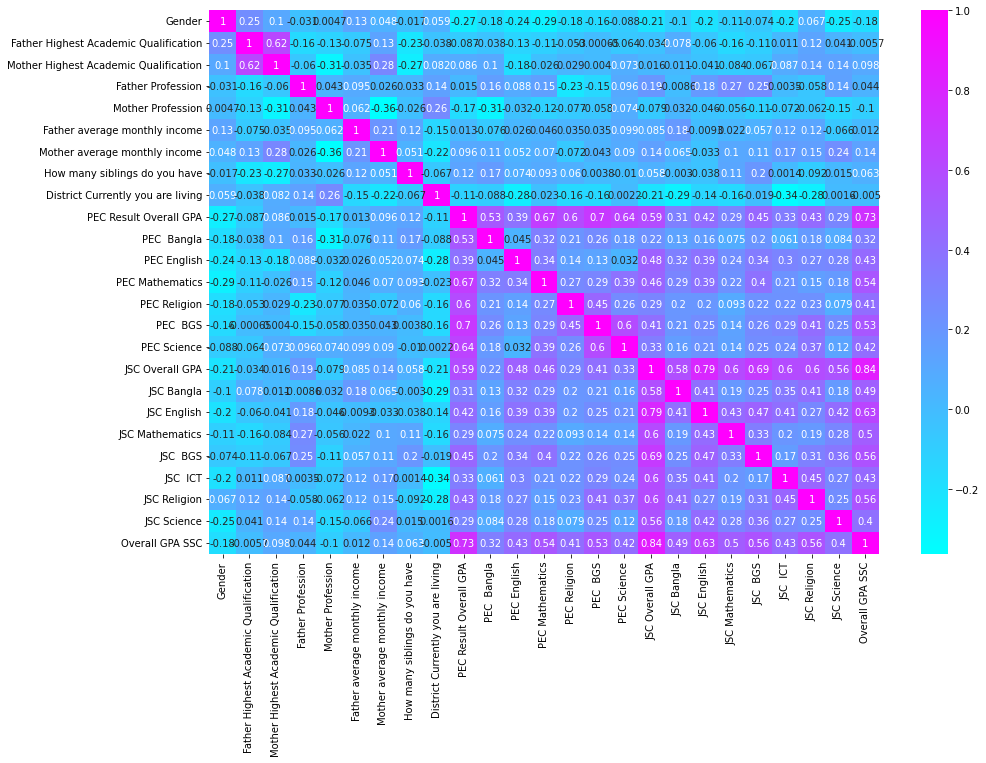

In [10]:
figure = plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True,cmap=plt.cm.cool)

In [11]:
X = df.drop(columns=['Overall GPA SSC'],axis=1)
y = df['Overall GPA SSC']

from sklearn.feature_selection import f_regression

# inputs:
#    X: pandas.DataFrame, features
#    y: pandas.Series, target variable
#    K: number of features to select

# compute F-statistics and initialize correlation matrix
F = pd.Series(f_regression(X, y)[0], index = X.columns)
corr = pd.DataFrame(.00001, index = X.columns, columns = X.columns)

In [12]:
# initialize list of selected features and list of excluded features
selected = []
not_selected = X.columns.to_list()
scores = []

K = 10
# repeat K times
for i in range(K):
  
    # compute (absolute) correlations between the last selected feature and all the (currently) excluded features
    if i > 0:
        last_selected = selected[-1]
        corr.loc[not_selected, last_selected] = X[not_selected].corrwith(X[last_selected]).abs().clip(.00001)
        
    # compute FCQ score for all the (currently) excluded features (this is Formula 2)
    score = F.loc[not_selected] / corr.loc[not_selected, selected].mean(axis = 1).fillna(.00001)
    
    # find best feature, add it to selected and remove it from not_selected
    if not i==0:
        scores.append(score)
    best = score.index[score.argmax()]
    selected.append(best)
    not_selected.remove(best)

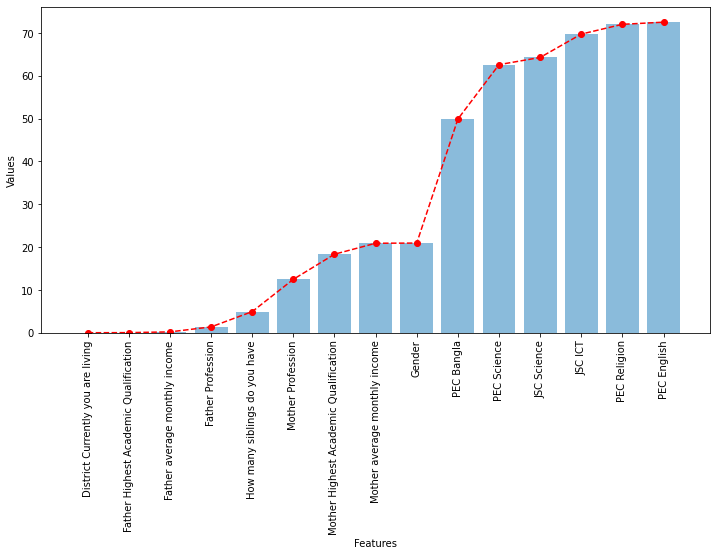

In [14]:
dd

In [16]:
# X = df.drop(columns=['Overall GPA SSC'],axis=1)
# y = df['Overall GPA SSC']

# selected_features = mrmr_classif(X=X, y=y, K=10)
# X_mrmr = df[selected_features]
# X_mrmr = scale(X_mrmr)

X = df[selected]
y = df['Overall GPA SSC']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##### Metrics

In [18]:
l = []
def mape(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100

def metrics(model_name, y_pred_test_x):
    mean = mean_absolute_error(y_test, y_pred_test_x)
    rmse = mean_squared_error(y_test, y_pred_test_x, squared=False)
    r2 = r2_score(y_test, y_pred_test_x)
    explained_variance = explained_variance_score(y_test, y_pred_test_x, sample_weight=None, multioutput='uniform_average')
    max_error_ = max_error(y_test, y_pred_test_x)
    mean_poisson_deviance_ = mean_poisson_deviance(y_test, y_pred_test_x)
    mean_gamma_deviance_ = mean_gamma_deviance(y_test, y_pred_test_x)
    mean_absolute_percentage_error_ = mean_absolute_percentage_error(y_test, y_pred_test_x)
    d2_tweedie_score_ = d2_tweedie_score(y_test, y_pred_test_x)
    mape_ = mape(y_test, y_pred_test_x)
    
    print("Mean Absolute Error: ",mean )
    print("Mean Squared Error: ",rmse )
    print("R2 score: ",r2 )
    print("Explained Variance: ",explained_variance )
    print("max_error: ",max_error_ )
    print("neg_mean_poisson_deviance: ",mean_poisson_deviance_ )
    print("neg_mean_gamma_deviance: ",mean_gamma_deviance_ )
    print("neg_mean_absolute_percentage_error: ",mean_absolute_percentage_error_ )
    print("d2_tweedie_score: ",d2_tweedie_score_ )
    print("mape_: ", mape_)
    l.append([model_name, explained_variance, max_error_, mean, rmse, r2, mape_, mean_poisson_deviance_, mean_gamma_deviance_, mean_absolute_percentage_error_, d2_tweedie_score_])

In [19]:
from sklearn.inspection import permutation_importance

feature_names = ['Gender', 'F Edu', 'M Edu', 'F Prof', 'M Prof', 'F Avg Inc', 'M Avg Inc', 'Siblings', 'Distri','Pec Res Ov' ,'Pec Bangla','Pec English', 'Pec Math', 'Pec Reli', 'Pec BGS', 'Pec Sci', 'Jsc Res Ov','Jsc Bangla','Jsc english','Jsc Math','Jsc bgs','jsc ict','jsc reli', 'jsc sci']
features = np.array(feature_names)

def feature_importance(model):
    perm_importance = permutation_importance(model, X_test, y_test)
    sorted_idx = perm_importance.importances_mean.argsort()
    plt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx])
    plt.xlabel("Permutation Importance")

def predicted_plot(y_pred_test_x):
    fig, ax = plt.subplots(nrows=1, ncols=2)
    from statsmodels.graphics.api import abline_plot
    ax[0].scatter(y_pred_test_x, y_test, color="black")
    abline_plot(intercept=0, slope=1, color="red", ax=ax[0])
    ax[0].grid(True)
    ax[0].set(xlabel="Predicted", ylabel="True", title="Predicted vs True")
    ax[0].legend()
    plt.show()

### SVR

Mean Absolute Error:  0.2512027694122851
Mean Squared Error:  0.3477594110099457
R2 score:  0.6028156247408054
Explained Variance:  0.6537414608356897
max_error:  1.0074886787686212
neg_mean_poisson_deviance:  0.03363658414522656
neg_mean_gamma_deviance:  0.00965977374610139
neg_mean_absolute_percentage_error:  0.07249475750933244
d2_tweedie_score:  0.6028156247408054
mape_:  7.249475750933245


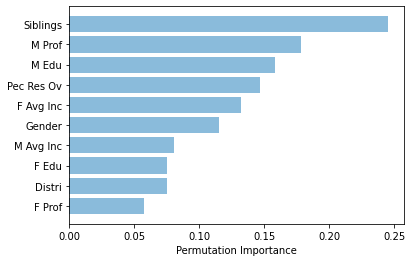

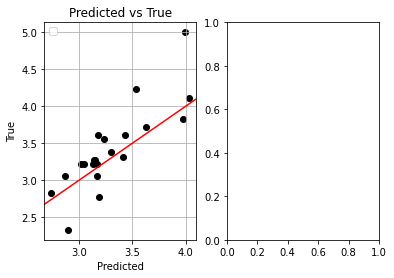

In [20]:
from sklearn.svm import SVR
svr = SVR(kernel = 'rbf')
svr.fit(X_train,y_train)

y_pred_test_x_svr = svr.predict(X_test)
metrics("SVR",y_pred_test_x_svr)
feature_importance(svr)
predicted_plot(y_pred_test_x_svr)

Mean Absolute Error:  0.18155714285714275
Mean Squared Error:  0.23722318303957654
R2 score:  0.8151801428828894
Explained Variance:  0.8277718005507988
max_error:  0.5673999999999975
neg_mean_poisson_deviance:  0.015999670519609148
neg_mean_gamma_deviance:  0.00471132380278238
neg_mean_absolute_percentage_error:  0.05239199537946659
d2_tweedie_score:  0.8151801428828894
mape_:  5.239199537946659


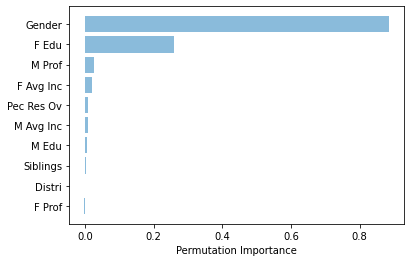

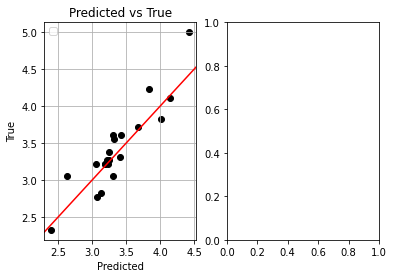

In [21]:
from sklearn.ensemble import RandomForestRegressor
rf_regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
rf_regressor.fit(X_train,y_train)

y_pred_test_x_rf = rf_regressor.predict(X_test)
metrics("Random Forest",y_pred_test_x_rf)
feature_importance(rf_regressor)
predicted_plot(y_pred_test_x_rf)

Mean Absolute Error:  0.17204300791094343
Mean Squared Error:  0.22456227001053333
R2 score:  0.8343818413578633
Explained Variance:  0.8490801569526094
max_error:  0.4881611655980951
neg_mean_poisson_deviance:  0.015890111122474303
neg_mean_gamma_deviance:  0.005096799502330213
neg_mean_absolute_percentage_error:  0.05176298562258822
d2_tweedie_score:  0.8343818413578633
mape_:  5.176298562258822


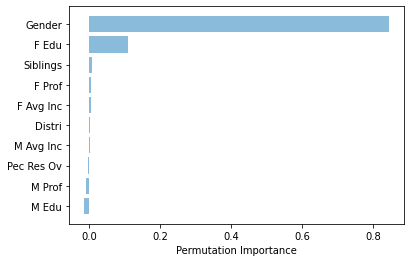

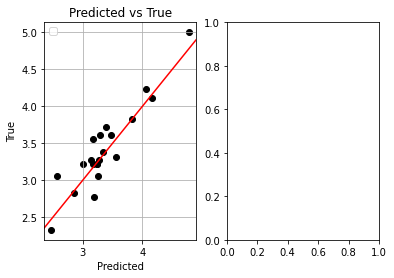

In [22]:
from sklearn import linear_model
lr = linear_model.LinearRegression()
lr.fit(X_train, y_train)

y_pred_test_x_lr = lr.predict(X_test)
metrics("Linear Regression",y_pred_test_x_lr)
feature_importance(lr)
predicted_plot(y_pred_test_x_lr)

Mean Absolute Error:  0.1647127239784803
Mean Squared Error:  0.22335932839298234
R2 score:  0.8361514650608486
Explained Variance:  0.8395132033587054
max_error:  0.4453333333333336
neg_mean_poisson_deviance:  0.014903339373671212
neg_mean_gamma_deviance:  0.004580960052763486
neg_mean_absolute_percentage_error:  0.04858434744762798
d2_tweedie_score:  0.8361514650608486
mape_:  4.858434744762798


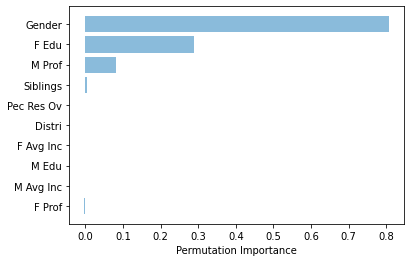

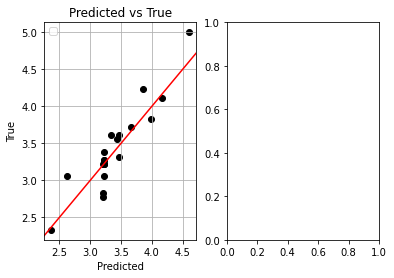

In [23]:
from sklearn.ensemble import AdaBoostRegressor
ADA = AdaBoostRegressor(n_estimators=5, random_state=42)
ADA.fit(X_train, y_train)

y_pred_test_x_ada = ADA.predict(X_test)
metrics("ADA Boost Regressor",y_pred_test_x_ada)
feature_importance(ADA)
predicted_plot(y_pred_test_x_ada)

Mean Absolute Error:  0.16591294197809128
Mean Squared Error:  0.2129072618564921
R2 score:  0.8511272120284072
Explained Variance:  0.8592370077117625
max_error:  0.4956197738647461
neg_mean_poisson_deviance:  0.013083915340700716
neg_mean_gamma_deviance:  0.0039044276963519564
neg_mean_absolute_percentage_error:  0.04834775104300534
d2_tweedie_score:  0.8511272120284071
mape_:  4.834775104300534


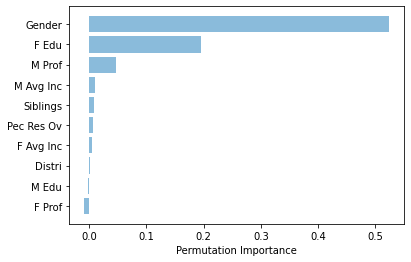

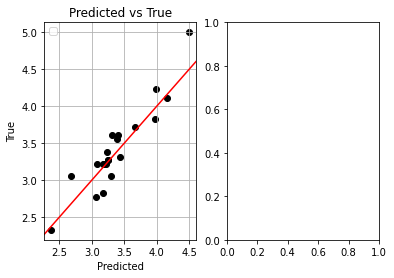

In [24]:
import xgboost
XG = xgboost.XGBRFRegressor()
XG.fit(X_train, y_train)

y_pred_test_x_XG = XG.predict(X_test)
metrics("XGBoost",y_pred_test_x_XG)
feature_importance(XG)
predicted_plot(y_pred_test_x_XG)

Mean Absolute Error:  0.2676205506585268
Mean Squared Error:  0.3597638853561484
R2 score:  0.574921145088098
Explained Variance:  0.6135613476985602
max_error:  0.9138444288409269
neg_mean_poisson_deviance:  0.03654769742062732
neg_mean_gamma_deviance:  0.010658249855391195
neg_mean_absolute_percentage_error:  0.08036864468660793
d2_tweedie_score:  0.574921145088098
mape_:  8.036864468660793


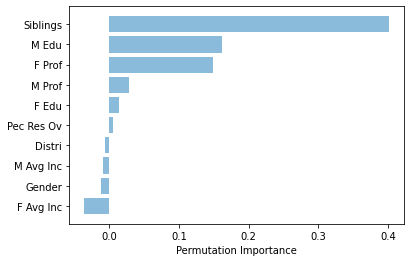

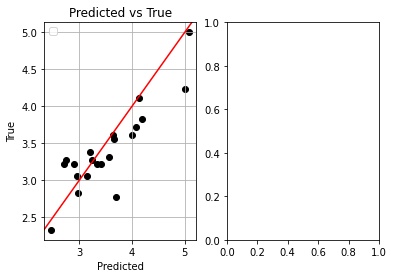

In [25]:
from sklearn.neural_network import MLPRegressor
MLP = MLPRegressor(random_state=42, max_iter=2000)
MLP.fit(X_train, y_train)

y_pred_test_x_MLP = MLP.predict(X_test)
metrics("MLP",y_pred_test_x_MLP)
feature_importance(MLP)
predicted_plot(y_pred_test_x_MLP)

Mean Absolute Error:  0.27304672981409595
Mean Squared Error:  0.4021515910563448
R2 score:  0.4688539515436283
Explained Variance:  0.4967013152906118
max_error:  1.2615271492754827
neg_mean_poisson_deviance:  0.044270116284887064
neg_mean_gamma_deviance:  0.01242699474384658
neg_mean_absolute_percentage_error:  0.077286287150266
d2_tweedie_score:  0.4688539515436283
mape_:  7.7286287150266


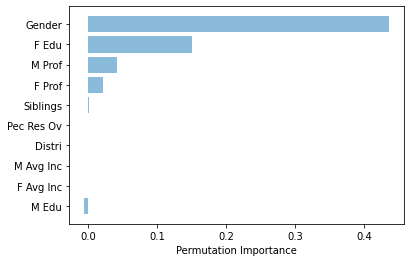

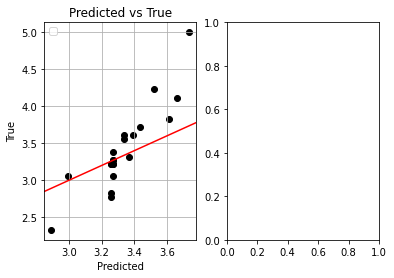

In [26]:
from sklearn.ensemble import GradientBoostingRegressor
GRADIENT = GradientBoostingRegressor(n_estimators=5, random_state=42)
GRADIENT.fit(X_train, y_train)

y_pred_test_x_GRADIENT = GRADIENT.predict(X_test)
metrics("GRADIENT",y_pred_test_x_GRADIENT)
feature_importance(GRADIENT)
predicted_plot(y_pred_test_x_GRADIENT)

In [27]:
estimator=[]
for i in range(1, 30):
    model = GradientBoostingRegressor(n_estimators=i, random_state=42)
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test) 
    estimator.append(score)
    
(estimator.index(max(estimator)))+1

27

Mean Absolute Error:  0.18905709250955957
Mean Squared Error:  0.24659272085936215
R2 score:  0.8002922690009586
Explained Variance:  0.8190284931579328
max_error:  0.6493436321947392
neg_mean_poisson_deviance:  0.0167967145147981
neg_mean_gamma_deviance:  0.004807606691918402
neg_mean_absolute_percentage_error:  0.05448897253752262
d2_tweedie_score:  0.8002922690009586
mape_:  5.448897253752262


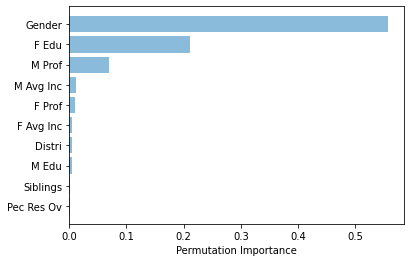

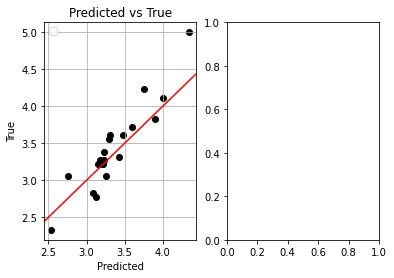

In [28]:
from sklearn.ensemble import GradientBoostingRegressor
GRADIENT = GradientBoostingRegressor(n_estimators= 17, random_state=42)
GRADIENT.fit(X_train, y_train)

y_pred_test_x_GRADIENT = GRADIENT.predict(X_test)
metrics("Optimized GRADIENT",y_pred_test_x_GRADIENT)
feature_importance(GRADIENT)
predicted_plot(y_pred_test_x_GRADIENT)

Mean Absolute Error:  0.23823809523809533
Mean Squared Error:  0.32406003265121236
R2 score:  0.6551062573262294
Explained Variance:  0.7006516043605122
max_error:  0.968
neg_mean_poisson_deviance:  0.029082407641107366
neg_mean_gamma_deviance:  0.00834772228508628
neg_mean_absolute_percentage_error:  0.06873525398832935
d2_tweedie_score:  0.6551062573262294
mape_:  6.873525398832935


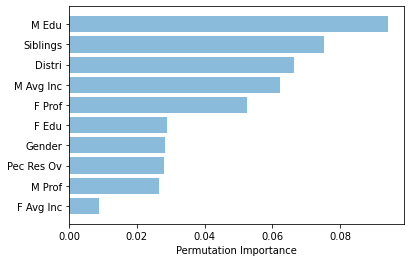

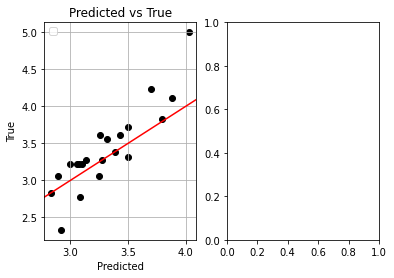

In [29]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train, y_train)

y_pred_test_x_knn = knn.predict(X_test)
metrics("KNN",y_pred_test_x_knn)
feature_importance(knn)
predicted_plot(y_pred_test_x_knn)

In [30]:
df = pd.DataFrame(l, columns=["model_name", "explained_variance", "max_error", "mean", "rmse", "r2","mape", "mean_poisson_deviance", "mean_gamma_deviance", "mean_absolute_percentage_error", "d2_tweedie_score"])
df

,model_name,explained_variance,max_error,mean,rmse,r2,mape,mean_poisson_deviance,mean_gamma_deviance,mean_absolute_percentage_error,d2_tweedie_score
0,SVR,0.653741,1.007489,0.251203,0.347759,0.602816,7.249476,0.033637,0.009660,0.072495,0.602816
1,Random Forest,0.827772,0.567400,0.181557,0.237223,0.815180,5.239200,0.016000,0.004711,0.052392,0.815180
2,Linear Regression,0.849080,0.488161,0.172043,0.224562,0.834382,5.176299,0.015890,0.005097,0.051763,0.834382
3,ADA Boost Regressor,0.839513,0.445333,0.164713,0.223359,0.836151,4.858435,0.014903,0.004581,0.048584,0.836151
4,XGBoost,0.859237,0.495620,0.165913,0.212907,0.851127,4.834775,0.013084,0.003904,0.048348,0.851127
5,MLP,0.613561,0.913844,0.267621,0.359764,0.574921,8.036864,0.036548,0.010658,0.080369,0.574921
6,GRADIENT,0.496701,1.261527,0.273047,0.402152,0.468854,7.728629,0.044270,0.012427,0.077286,0.468854
7,Optimized GRADIENT,0.819028,0.649344,0.189057,0.246593,0.800292,5.448897,0.016797,0.004808,0.054489,0.800292
8,KNN,0.700652,0.968000,0.238238,0.324060,0.655106,6.873525,0.029082,0.008348,0.068735,0.655106


In [32]:
# import shap library
import shap

# explain the model's predictions using SHAP
explainer = shap.TreeExplainer(rf_regressor)
shap_values = explainer.shap_values(X_train)

# visualize the first prediction's explanation 
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0,:], X_train[0])

In [ ]:
import lime
import lime.lime_tabular
# LIME has one explainer for all the models
explainer = lime.lime_tabular.LimeTabularExplainer(X_train, feature_names= feature_names,
                                                  class_names=['MEDV'], verbose=True, mode='regression')

In [ ]:
j = 5
exp = explainer.explain_instance(X_test[j], rf_regressor.predict, num_features=6)

# Show the predictions
exp.show_in_notebook(show_table=True)

In [ ]:
j = 7
exp = explainer.explain_instance(X_test[j], rf_regressor.predict, num_features=6)

# Show the predictions
exp.show_in_notebook(show_table=True)

In [ ]:
j = 16
exp = explainer.explain_instance(X_test[j], rf_regressor.predict, num_features=6)

# Show the predictions
exp.show_in_notebook(show_table=True)

In [ ]:
test = y_test
test = test.to_numpy()

In [ ]:
for i in range(10,15):
    exp = explainer.explain_instance(X_test[i], rf_regressor.predict, num_features=6)
    print("Y True: ", test[i])
    # Show the predictions
    exp.show_in_notebook(show_table=True)